# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    

In [3]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '231117'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic>=100)
endpoints_md_all = arrow::read_feather(glue("{base_path}/data/endpoints_md.feather")) 
endpoints = endpoint_defs$endpoint

In [4]:
library(data.table)
library(arrow)

In [5]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [6]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [7]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = experiment

In [8]:
eligable_eids = arrow::read_feather(glue("{experiment_path}/eligible_eids_long_{today}.feather")) %>% 
    mutate(included = 1) %>% mutate(eid = as.character(eid))
#eligable_eids$eid = as.numeric(levels(eligable_eids$eid))[eligable_eids$eid]

In [9]:
data_outcomes = arrow::read_feather(glue("{base_path}/data/data_outcomes_long_230320.feather", as_data_frame=FALSE)) 

In [10]:
partitions = 0:9
paths = c()
for (p in partitions){
    #temp_path = glue("{experiment_path}/loghs/Identity(Records)+MLP/{p}/test.feather")
    temp_path = glue("{experiment_path}/loghs/RetinaUKB/{p}/test.feather")
    paths = c(paths, temp_path)
    }

In [11]:
read_predictions = function(paths, endpoint_list){
    predictions = paths %>% map_df(
        ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_list)))) %>% 
        pivot_longer(all_of(endpoint_list), names_to="endpoint", values_to="logh") %>%
        mutate(eid = as.character(eid)) %>%
        select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
    return(predictions)
    }

map <- c(`1` = 'top10',
            `2` = 'rest',
         `3` = 'rest',
         `4` = 'rest',
         `5` = 'rest',
         `6` = 'rest',
         `7` = 'rest',
         `8` = 'rest',
         `9` = 'rest',
         `10` = 'rest')

calc_ratios = function(pred_outcomes, endpoints_md){
    
    logh_inc = pred_outcomes %>% 
        filter(included==1) %>% 
        group_by(endpoint) %>% 
        mutate(logh_perc = ntile(logh, 10)) %>% 
#         mutate(logh_perc=case_when(logh_perc %in% 1:9 ~ 1, 
#                                     logh_perc %in% 10:11 ~ 10,
#                                     TRUE ~ "NA")) %>%
        ungroup()

    logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event, na.rm=TRUE), event_rate = mean(event)) #%>% as_tibble()
    temp_ordered = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoint_defs$endpoint)) 
    temp_ratios = temp_ordered %>% #filter(logh_perc %in% c(1, 10)) %>% 
        pivot_wider(names_from=logh_perc, values_from=c(n, event_rate)) %>% 
        mutate(event_rate_ratio=event_rate_10/event_rate_1) %>%
#             mutate(ratio=ratio_top10/ratio_rest) %>%

        #mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>%
        #select(endpoint, n_1, n_10, event_rate_1, ratio_10, ratio) %>%
#             select(endpoint, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

        arrange(event_rate_ratio) #%>% as_tibble()
    return(temp_ratios)
    }

In [12]:
prepare_ratios = function(endpoint_list){
    
    temp_outcomes = data_outcomes %>% filter(endpoint %in% endpoint_list)
    temp_eligability = eligable_eids %>% filter(endpoint %in% endpoint_list)
    temp_outcomes_eligability = temp_outcomes %>% left_join(temp_eligability, by=c("eid", "endpoint"))
    pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, by=c("eid", "endpoint")) %>% as_tibble()
    temp_df = calc_ratios(pred_outcomes, endpoints_md)
    
    return(temp_df)
    }

In [13]:
ep_chunks = split(endpoint_defs$endpoint, ceiling(seq_along(endpoint_defs$endpoint)/500))

In [14]:
ratio_dfs = c()
for (i in 1:length(ep_chunks)){
    endpoint_list = ep_chunks[[i]]
    ratio_dfs[[i]] = prepare_ratios(endpoint_list)
    print(ratio_dfs[[i]])
    flush.console()
}

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


# A tibble: 173 × 22
# Groups:   endpoint [173]
   endpoint         n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>          <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 phecode_981       10     6     9    10    16    10     6     7     7     6
 2 phecode_439       12    16    11    23    17    16    19    14     9     8
 3 phecode_116-1     13    20    19    12    17    14    18    17    25    10
 4 phecode_556       55    55    53    48    58    52    44    40    56    48
 5 phecode_444-11     9     9     5    10     6    13    18    16    11     8
 6 phecode_997       10    17     7    13    16    16    18    10    11     9
 7 phecode_444       10     8     6    17     7    11    16    21    11     9
 8 phecode_444-1     10    10     5    13    10    10    17    20    12     9
 9 phecode_532       19    27    37    31    31    29    29    31    40    21
10 phecode_527       57    56    66    65    62    70    59    65    74    64
# ℹ 163 more row

In [15]:
ratio_df_complete = bind_rows(ratio_dfs) %>% ungroup() %>%
    mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>% 
    #select(endpoint, endpoint_string, n_1, n_10, ratio_1, ratio_10, ratio) %>%
#     select(endpoint, endpoint_string, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

    arrange(event_rate_ratio) %>% left_join(endpoint_defs %>% select(endpoint, n_epic, phecode_category) %>% as_tibble(), by="endpoint") 

ratio_df_complete

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,⋯,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,n_epic,phecode_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>
phecode_981,10,6,9,10,16,10,6,7,7,⋯,0.022377622,0.013986014,0.008391608,0.009790210,0.009790210,0.008391608,0.6008392,Family history of malignant neoplasm,122,Stat
phecode_439,12,16,11,23,17,16,19,14,9,⋯,0.023448276,0.022068966,0.026206897,0.019310345,0.012430939,0.011049724,0.6675875,Hemorrhoids,145,Cardio
phecode_116-1,13,20,19,12,17,14,18,17,25,⋯,0.023578363,0.019417476,0.024965326,0.023578363,0.034674064,0.013869626,0.7702977,Secondary malignancy of lymph nodes,170,Neoplasms
phecode_556,55,55,53,48,58,52,44,40,56,⋯,0.081575246,0.073136428,0.061884669,0.056258790,0.078762307,0.067510549,0.8739547,Other symptoms involving the digestive system and abdomen,527,GI
phecode_444-11,9,9,5,10,6,13,18,16,11,⋯,0.008522727,0.018465909,0.025568182,0.022727273,0.015625000,0.011363636,0.8888889,Varicose veins of lower extremities,118,Cardio
phecode_997,10,17,7,13,16,16,18,10,11,⋯,0.022408964,0.022408964,0.025210084,0.014005602,0.015406162,0.012605042,0.9000000,Family history of other condition,134,Stat
phecode_444,10,8,6,17,7,11,16,21,11,⋯,0.009943182,0.015625000,0.022759602,0.029871977,0.015647226,0.012802276,0.9012802,Venous insufficiency,131,Cardio
phecode_444-1,10,10,5,13,10,10,17,20,12,⋯,0.014204545,0.014204545,0.024182077,0.028449502,0.017069701,0.012802276,0.9012802,Varicose veins,131,Cardio
phecode_532,19,27,37,31,31,29,29,31,40,⋯,0.043417367,0.040616246,0.040616246,0.043417367,0.056022409,0.029453015,1.1068133,Other disorders of the intestines,313,GI


In [16]:
options(pillar.print_max = Inf)
ratio_df_complete %>% 
    arrange(event_rate_ratio) %>%
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/EPIC_EventRates_PhenomeWide.csv"))

In [17]:
nrow(ratio_df_complete)

[1] 173

In [18]:
# 0.66:
for (t in c(1, 3, 5, 10, 50)){
     n = nrow(ratio_df_complete %>% filter(event_rate_ratio > t))
     freq = round(n*100/nrow(ratio_df_complete))
     print(glue("nrows with rate ratio > {t}: {n} ({freq}%)"))
}

nrows with rate ratio > 1: 165 (95%)
nrows with rate ratio > 3: 114 (66%)
nrows with rate ratio > 5: 73 (42%)
nrows with rate ratio > 10: 31 (18%)
nrows with rate ratio > 50: 3 (2%)


In [19]:
ratio_df_complete %>% 
    select(endpoint, endpoint_string, n_epic, phecode_category, event_rate_ratio)%>% filter(n_epic>50) %>% arrange(event_rate_ratio)
#%>% filter(event_rate_ratio <= 1.5) 

endpoint,endpoint_string,n_epic,phecode_category,event_rate_ratio
<chr>,<fct>,<int>,<chr>,<dbl>
phecode_981,Family history of malignant neoplasm,122,Stat,0.6008392
phecode_439,Hemorrhoids,145,Cardio,0.6675875
phecode_116-1,Secondary malignancy of lymph nodes,170,Neoplasms,0.7702977
phecode_556,Other symptoms involving the digestive system and abdomen,527,GI,0.8739547
phecode_444-11,Varicose veins of lower extremities,118,Cardio,0.8888889
phecode_997,Family history of other condition,134,Stat,0.9000000
phecode_444,Venous insufficiency,131,Cardio,0.9012802
phecode_444-1,Varicose veins,131,Cardio,0.9012802
phecode_532,Other disorders of the intestines,313,GI,1.1068133


In [20]:
#ratio_df_complete %>% filter(event_rate_ratio<10) %>% arrange(desc(ratio_1)) #%>% filter(!str_detect(endpoint, "-"))

In [21]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


## Nice overview over all categories

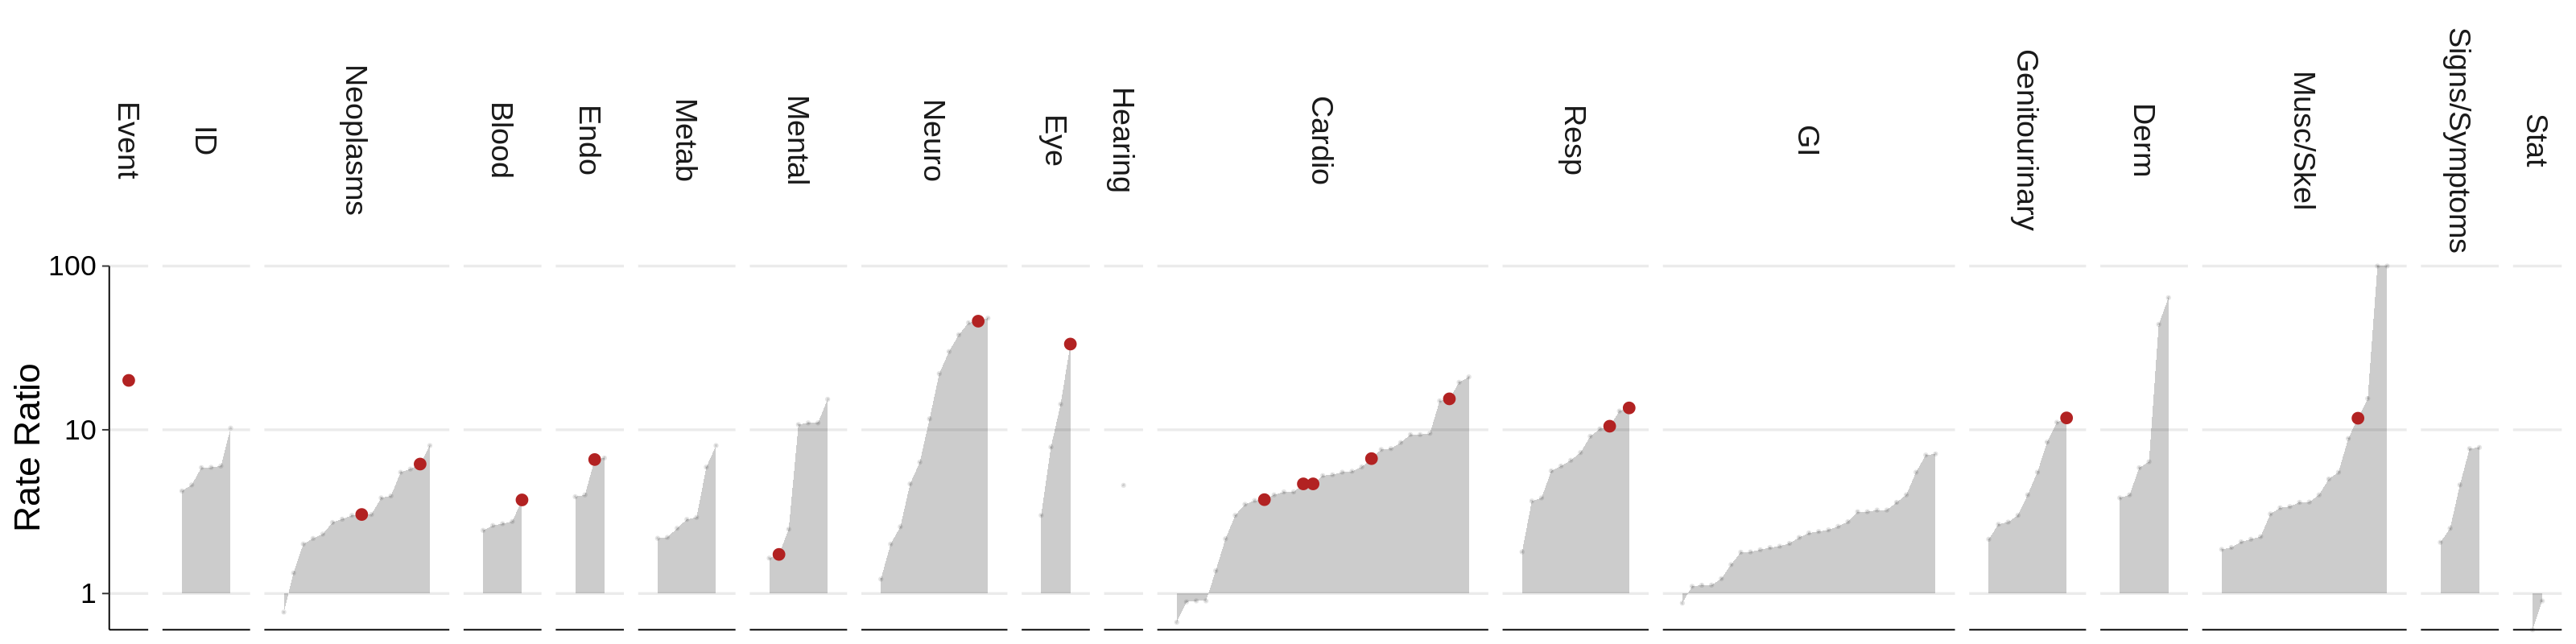

In [23]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp_pos = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp_pos %>% arrange(event_rate_ratio))$endpoint

#index <- temp_pos$ratio < 0
#temp_pos$ratio[index] <- 0.


temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

#index <- temp_pos$log_ratio < 0
#temp_pos$log_ratio[index] <- 0.

overview = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    #geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, log(100)), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    scale_x_discrete(expand=expansion(add=2))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [24]:
plot_name = "SupplFigure2a_EPIC_EventRates_PhenomeWide"
overview %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
overview %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/SupplFigure2a.csv"))

## Merge UKB / EPIC

In [37]:
endpoints_md_all = arrow::read_feather(glue("{project_path}/endpoints_md.feather"))

In [25]:
ukb = fread("UKB_EventRates_PhenomeWide.csv") %>% as_tibble() %>% 
    mutate(ratio = event_rate_ratio, n=rowSums(select(., starts_with("n_")))) %>% ungroup() %>% 
    select(phecode_category,  endpoint, n, starts_with("n_"), ratio) %>% left_join(endpoints_md_all %>% select(phecode_category, phecode_string, endpoint)) %>% arrange(endpoint) %>% #%>%
    select(phecode_category, endpoint, phecode_string, n, starts_with("n_"), ratio) %>% arrange(endpoint)
colnames(ukb)[4:15] = glue("ukb_{colnames(ukb)[4:15]}")
ukb

Joining with `by = join_by(phecode_category, endpoint)`


phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,ukb_n_7,ukb_n_8,ukb_n_9,ukb_n_10,ukb_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Death,OMOP_4306655,NA,3474,51,87,133,204,253,285,372,518,667,904,17.728384
ID,phecode_002,Staphylococcus,516,19,19,34,28,52,38,49,55,81,141,7.422268
ID,phecode_002-1,Staphylococcus aureus,342,11,20,27,20,27,25,28,45,54,85,7.728537
ID,phecode_003,Escherichia coli,691,24,20,35,46,60,77,76,91,105,157,6.542737
ID,phecode_004,Streptococcus,353,13,14,20,31,29,30,41,42,50,83,6.385661
ID,phecode_009,Pseudomonas,227,12,6,8,16,22,20,26,28,38,51,4.250000
ID,phecode_011,Klebsiella,156,9,4,4,12,9,13,21,23,29,32,3.556136
ID,phecode_015,Clostridium,129,3,8,7,8,10,6,16,21,17,33,11.001797
ID,phecode_015-2,Clostridium difficile,124,4,5,8,6,10,5,16,21,15,34,8.500000


In [32]:
fread("UKB_EventRates_PhenomeWide.csv")

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,⋯,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,n,phecode_category
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
phecode_610,14,16,12,9,12,7,11,7,11,⋯,0.0036275695,0.002116082,0.003325272,0.002116082,0.003325272,0.002418380,0.5716013,Benign mammary dysplasias,107,Genitourinary
phecode_603-5,11,9,16,10,13,12,11,11,11,⋯,0.0046611689,0.004302617,0.003944066,0.003945481,0.003945481,0.002510760,0.6365919,Orchitis and epididymitis,111,Genitourinary
phecode_619-3,28,19,12,15,18,23,19,24,21,⋯,0.0054479419,0.006961259,0.005752346,0.007266122,0.006357856,0.005752346,0.6787769,Noninflammatory disorders of cervix,198,Genitourinary
phecode_522-11,22,19,24,21,23,19,14,20,18,⋯,0.0037637048,0.003109147,0.002291326,0.003273322,0.002945990,0.002454992,0.6819298,Crohn's disease,195,GI
phecode_503,19,21,20,15,21,15,16,14,14,⋯,0.0034353018,0.002453787,0.002617373,0.002290201,0.002290576,0.002126963,0.6843225,Diseases of pulp and periapical tissues,168,GI
phecode_139-54,10,14,9,15,13,16,14,17,13,⋯,0.0046544934,0.005728607,0.005012531,0.006086645,0.004656160,0.002507163,0.7002507,Testicular limpoma,128,Neoplasms
phecode_614-5,17,14,12,16,18,17,9,15,13,⋯,0.0054528931,0.005149955,0.002727273,0.004545455,0.003939394,0.003636364,0.7060963,"Inflammatory disease of cervix, vagina, and vulva",143,Genitourinary
phecode_619-4,12,12,13,9,8,11,4,15,14,⋯,0.0024154589,0.003321256,0.001208094,0.004530353,0.004228330,0.003020236,0.8335850,Noninflammatory disorders of vagina,108,Genitourinary
phecode_503-5,15,18,19,11,18,16,15,11,14,⋯,0.0029435814,0.002616517,0.002452984,0.001799149,0.002289827,0.002126268,0.8668084,Periapical abscess,150,GI


In [26]:
epic = temp_pos %>% mutate(phecode_string = endpoint_string, n=n_epic, ratio=event_rate_ratio) %>% select(phecode_category, phecode_string, n, starts_with("n_"), ratio, -n_epic) %>% ungroup()
colnames(epic)[3:14] = glue("epic_{colnames(epic)[3:14]}")
epic

phecode_category,phecode_string,epic_n,epic_n_1,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Stat,Family history of malignant neoplasm,122,10,6,9,10,16,10,6,7,7,6,0.6008392
Cardio,Hemorrhoids,145,12,16,11,23,17,16,19,14,9,8,0.6675875
Neoplasms,Secondary malignancy of lymph nodes,170,13,20,19,12,17,14,18,17,25,10,0.7702977
GI,Other symptoms involving the digestive system and abdomen,527,55,55,53,48,58,52,44,40,56,48,0.8739547
Cardio,Varicose veins of lower extremities,118,9,9,5,10,6,13,18,16,11,8,0.8888889
Stat,Family history of other condition,134,10,17,7,13,16,16,18,10,11,9,0.9000000
Cardio,Venous insufficiency,131,10,8,6,17,7,11,16,21,11,9,0.9012802
Cardio,Varicose veins,131,10,10,5,13,10,10,17,20,12,9,0.9012802
GI,Other disorders of the intestines,313,19,27,37,31,31,29,29,31,40,21,1.1068133


In [27]:
st3_merged = ukb %>% left_join(epic, by=c("phecode_category", "phecode_string")) 

In [28]:
st3_merged

phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,⋯,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Death,OMOP_4306655,NA,3474,51,87,133,204,253,285,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002,Staphylococcus,516,19,19,34,28,52,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002-1,Staphylococcus aureus,342,11,20,27,20,27,25,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_003,Escherichia coli,691,24,20,35,46,60,77,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_004,Streptococcus,353,13,14,20,31,29,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_009,Pseudomonas,227,12,6,8,16,22,20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_011,Klebsiella,156,9,4,4,12,9,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015,Clostridium,129,3,8,7,8,10,6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015-2,Clostridium difficile,124,4,5,8,6,10,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [29]:
st3_merged %>% write_csv("outputs/SupplTable3_ukbepic_merged.csv")

In [31]:
st3_merged

phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,⋯,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Death,OMOP_4306655,NA,3474,51,87,133,204,253,285,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002,Staphylococcus,516,19,19,34,28,52,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002-1,Staphylococcus aureus,342,11,20,27,20,27,25,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_003,Escherichia coli,691,24,20,35,46,60,77,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_004,Streptococcus,353,13,14,20,31,29,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_009,Pseudomonas,227,12,6,8,16,22,20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_011,Klebsiella,156,9,4,4,12,9,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015,Clostridium,129,3,8,7,8,10,6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015-2,Clostridium difficile,124,4,5,8,6,10,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [30]:
ukb %>% left_join(epic, by=c("phecode_category", "phecode_string"))

phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,⋯,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Death,OMOP_4306655,NA,3474,51,87,133,204,253,285,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002,Staphylococcus,516,19,19,34,28,52,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002-1,Staphylococcus aureus,342,11,20,27,20,27,25,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_003,Escherichia coli,691,24,20,35,46,60,77,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_004,Streptococcus,353,13,14,20,31,29,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_009,Pseudomonas,227,12,6,8,16,22,20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_011,Klebsiella,156,9,4,4,12,9,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015,Clostridium,129,3,8,7,8,10,6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_015-2,Clostridium difficile,124,4,5,8,6,10,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
